# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Understanding

Perkembangan industri telekomunikasi sangatlah cepat, hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi. 

Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya internet service provider yang dapat menimbulkan persaingan antar provider. 

Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai **Customer Churn**. 

Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

## Explaining Dataset

Deskripsi masing-masing kolom:
- `state`, US State
- `account_length`, Total bulan customer menjadi user telco provider
- `area_code`, Kode area
- `international_plan`, Customer memiliki plan international
- `voice_mail_plan`, Customer memiliki plan voice mail
- `number_vmail_messages`, Total pesan voice mail
- `total_day_minutes`, Total minutes pada day calls
- `total_day_call`, Total day call
- `total_day_charge`, Total charge dari day calls
- `total_eve_minutes`, Total menit pada evening call
- `total_eve_calls`, Total evening calls
- `total_eve_charge`, Total charge pada evening call
- `total_night_minutes`, Total menit pada night call
- `total_night_calls`, Total night call
- `total_night_charge`, Total charge pada night call
- `total_intl_minutes`, Total menit pada international call
- `total_intl_calls`, Total international call
- `total_intl_charge`, Total charge pada international call
- `number_customer_service_calls`, Total call kepada customer service
- `churn`, Customer churn

# Read Data

In [2]:
df_train = pd.read_csv('./Datasets/train.csv')
df_test = pd.read_csv('./Datasets/test.csv')

In [3]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:
- Identify Data.
- Univariat Analysis - analisis deskriptif dengan satu variabel.
- Bivariat Analysis - analisis relasi dengan dua variabel yang biasanya dengan target variabel.
- Multivariat Analysis - analisis yang menggunakan lebih dari atau sama dengan tiga variabel.
- Outlier Detection.

# Identify Data

In [4]:
df_train.shape, df_test.shape

((4250, 20), (750, 20))

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [7]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [9]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

In [10]:
for col_name in df_train.select_dtypes(include=['object']).columns.tolist():
    print('Variable ',col_name)
    print(df_train[col_name].unique())

Variable  state
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
Variable  area_code
['area_code_415' 'area_code_408' 'area_code_510']
Variable  international_plan
['no' 'yes']
Variable  voice_mail_plan
['yes' 'no']
Variable  churn
['no' 'yes']


In [11]:
df_train['target'] = df_train.churn.replace(['no', 'yes'], [0, 1])

In [12]:
num_feature = df_train.select_dtypes(include=['number']).columns.tolist()
cat_feature = df_train.select_dtypes(include=['object']).columns.tolist()

## Univariat Analysis

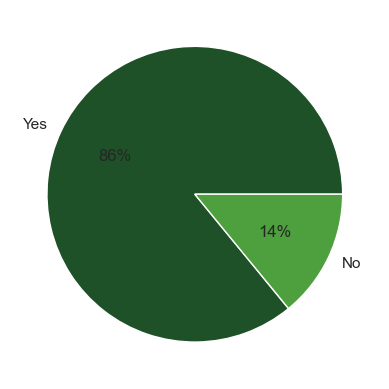

In [13]:
churn = df_train.churn.value_counts()
labels = ['Yes','No']
plt.pie(churn, labels=labels, colors=['#1E5128','#4E9F3D'], autopct='%.0f%%')
plt.show()

## Bivariat Analysis Numerical Variable

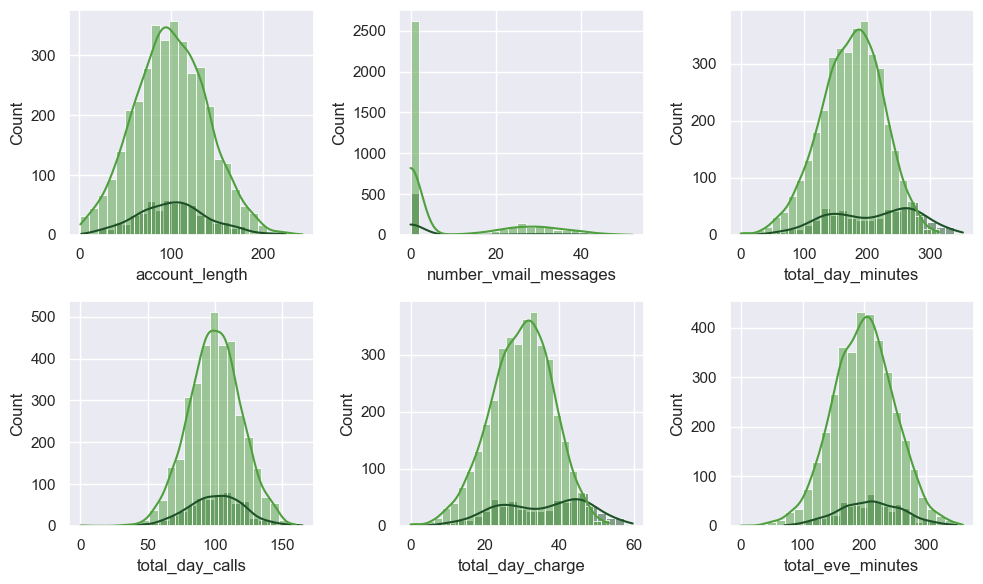

In [15]:
fig, axis = plt.subplots(2, 3, figsize=(10, 6))
for col, ax in zip(num_feature, axis.flatten()):
    sns.histplot(x=col, data=df_train[df_train.churn == 'yes'], kde=True, bins=25, color='#1E5128', alpha=0.5, ax=ax)
    sns.histplot(x=col, data=df_train[df_train.churn == 'no'], kde=True, bins=25, color='#4E9F3D', alpha=0.5, ax=ax)
plt.tight_layout()
plt.show()

## Bivariat Analysis Categorical Variable

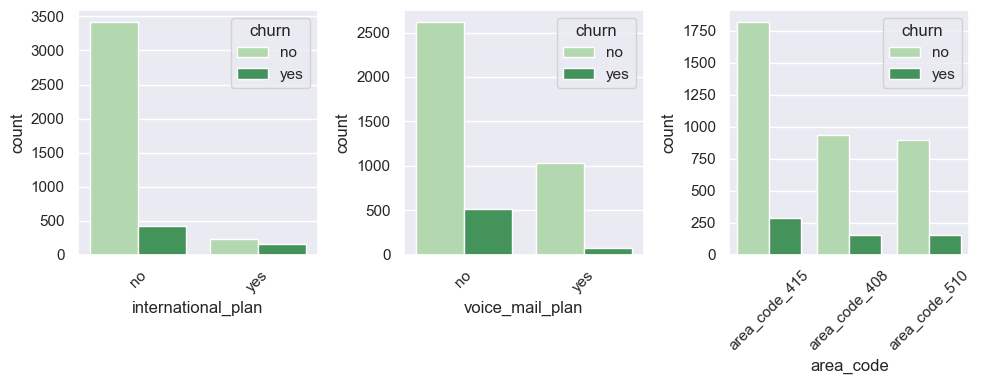

In [16]:
columns = ['international_plan','voice_mail_plan','area_code']
fig, axis = plt.subplots(1,3, figsize=(10, 4))
for col, ax in zip(columns, axis.flatten()):
    sns.countplot(x=col, data=df_train, hue='churn', order=df_train[col].value_counts().index, color='g', palette='Greens', ax=ax)
    ax.set_xticklabels(df_train[col].value_counts().index, rotation=45)
plt.tight_layout()
plt.show()

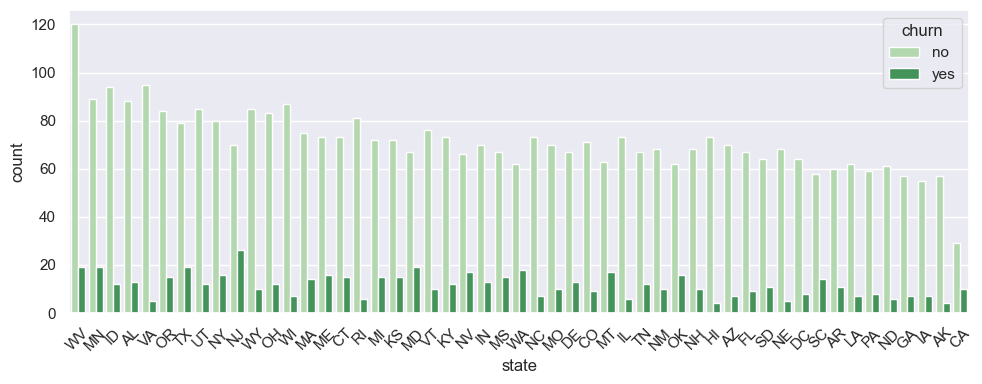

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(x='state', data=df_train, hue='churn', order=df_train['state'].value_counts().index, color='g', palette='Greens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Multivariat Analysis

In [18]:
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.078852
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771,0.046647
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893,-0.012699


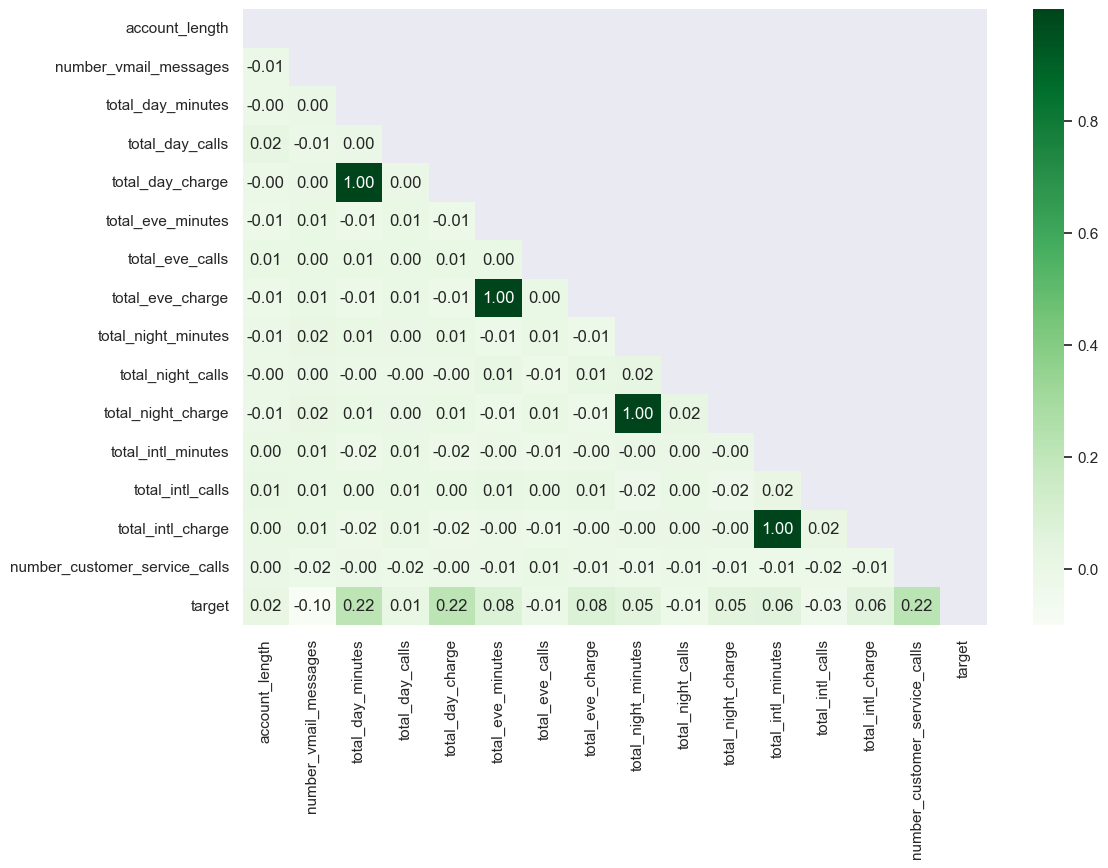

In [19]:
plt.figure(figsize=(12,8))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='Greens', annot=True, mask=mask, fmt='.2f')
plt.show()

## Outlier Detection

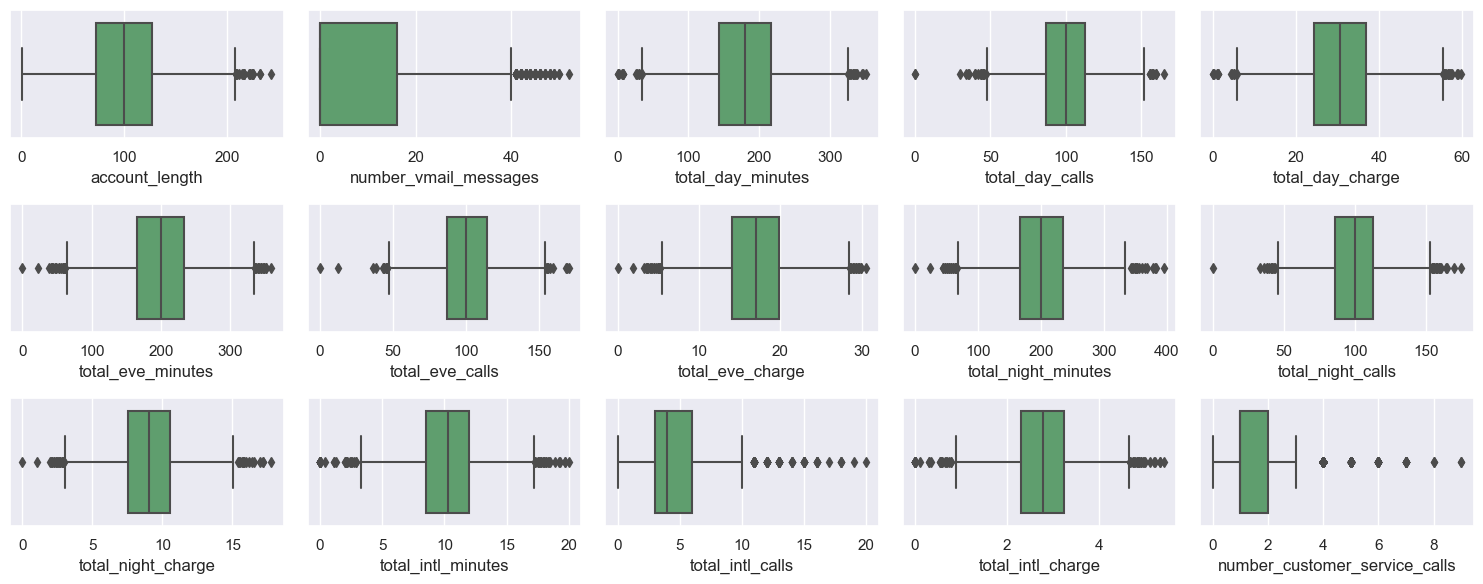

In [20]:
fig, axis = plt.subplots(3,5, figsize=(15, 6))
for col, ax in zip(num_feature[:-1], axis.flatten()):
    sns.boxplot(x=col, data=df_train, color='g', ax=ax)
plt.tight_layout()
plt.show()

# Pre-processing Data

Pre-processing data meliputi:
- Data Reduction
- Feature Encoding
- Standardization or Normalization

In [21]:
df_train.columns, df_test.columns

(Index(['state', 'account_length', 'area_code', 'international_plan',
        'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls', 'churn', 'target'],
       dtype='object'),
 Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
        'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls'],
       dtype='object'))

## Data Reduction

In [22]:
df_train.drop([
    'state',
    'area_code',
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_charge',
    'churn'], axis=1, inplace=True)
df_test.drop([
    'id',
    'state',
    'area_code',
    'total_day_charge',
    'total_eve_charge',
    'total_night_charge',
    'total_intl_charge'], axis=1, inplace=True)

## Feature Encoding

In [23]:
df_train['international_plan'] = df_train.international_plan.replace(['no', 'yes'], [0, 1])
df_train['voice_mail_plan'] = df_train.voice_mail_plan.replace(['no', 'yes'], [0, 1])

In [24]:
df_test['international_plan'] = df_test.international_plan.replace(['no', 'yes'], [0, 1])
df_test['voice_mail_plan'] = df_test.voice_mail_plan.replace(['no', 'yes'], [0, 1])

## Standardization and Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
X = df_train.drop(['target'], axis=1)
y = df_train['target']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [28]:
[col for col in df_train.columns if df_train[col].max()>1]

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_calls',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls']

In [29]:
to_scale = ['account_length',
            'total_day_minutes',
            'total_day_calls',
            'total_eve_minutes',
            'total_eve_calls',
            'total_night_minutes',
            'total_night_calls',
            'total_intl_minutes',
            'total_intl_calls',
            'number_customer_service_calls'
        ]   

scaler_std = StandardScaler()
scaler_std.fit(x_train[to_scale])
x_train[to_scale] = scaler_std.transform(x_train[to_scale])
x_test[to_scale] = scaler_std.transform(x_test[to_scale])
df_test[to_scale] = scaler_std.transform(df_test[to_scale])

In [30]:
to_scale = ['number_vmail_messages',]

scaler_mm = MinMaxScaler()
scaler_mm.fit(x_train[to_scale])
x_train[to_scale] = scaler_mm.transform(x_train[to_scale])
x_test[to_scale] = scaler_mm.transform(x_test[to_scale])
df_test[to_scale] = scaler_mm.transform(df_test[to_scale])

# Modeling & Evaluate Model

Algoritma yang akan digunakan antara lain:
- Logistict Regression
- Random Forest Classifier

Evaluate Metrics:
- Accuracy
- F1 Score
- ROC + AUC

In [31]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score, roc_curve

In [32]:
def evaluate(model, features, labels):
    predictions = model.predict(features)
    errors = abs(predictions - labels)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(labels, predictions)))
    print('F1-Score = {:0.2f}'.format(f1_score(labels, predictions)))

## Logistic Regression Model

In [33]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [34]:
print("Evaluate training score:")
evaluate(lr_model, x_train, y_train)

Evaluate training score:
Model Performance
Average Error: 0.1371 degrees.
Accuracy = 0.86%.
F1-Score = 0.28


In [35]:
print("Evaluate testing score:")
evaluate(lr_model, x_test, y_test)

Evaluate testing score:
Model Performance
Average Error: 0.1261 degrees.
Accuracy = 0.87%.
F1-Score = 0.31


## Random Forest Model

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
print("Evaluate training score:")
evaluate(rf_model, x_train, y_train)

Evaluate training score:
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 1.00%.
F1-Score = 1.00


In [38]:
print("Evaluate testing score:")
evaluate(rf_model, x_test, y_test)

Evaluate testing score:
Model Performance
Average Error: 0.0461 degrees.
Accuracy = 0.95%.
F1-Score = 0.82


## Tuning Parameter Logistic Regression

In [39]:
params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4,4,20)
}

lr_grid_model = GridSearchCV(LogisticRegression(), param_grid=params, scoring='accuracy', cv=10)

lr_grid_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [40]:
print("Evaluate training score:")
evaluate(lr_grid_model, x_train, y_train)

Evaluate training score:
Model Performance
Average Error: 0.1352 degrees.
Accuracy = 0.86%.
F1-Score = 0.20


In [41]:
print("Evaluate training score:")
evaluate(lr_grid_model, x_test, y_test)

Evaluate training score:
Model Performance
Average Error: 0.1336 degrees.
Accuracy = 0.87%.
F1-Score = 0.15


In [42]:
lr_grid_model.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}

## Tuning Parameter Random Forest

In [43]:
params = {
    'bootstrap': [True],
    'max_depth': [15, 25, 50],
    'max_features': [6, 8, 10, 13],
    'n_estimators': [100, 150, 200],
    'criterion' : ['gini','entropy']
}

rf_grid_model = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy', cv=10)

rf_grid_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, 50],
                         'max_features': [6, 8, 10, 13],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [44]:
print("Evaluate training score:")
evaluate(rf_grid_model, x_train, y_train)

Evaluate training score:
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 1.00%.
F1-Score = 1.00


In [45]:
print("Evaluate testing score:")
evaluate(rf_grid_model, x_test, y_test)

Evaluate testing score:
Model Performance
Average Error: 0.0452 degrees.
Accuracy = 0.95%.
F1-Score = 0.82


In [46]:
rf_grid_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 6,
 'n_estimators': 150}

In [50]:
rf_model_tune = RandomForestClassifier(n_estimators=200, bootstrap=True, criterion='entropy', max_depth=25, max_features=6)
rf_model_tune.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, max_features=6,
                       n_estimators=200)

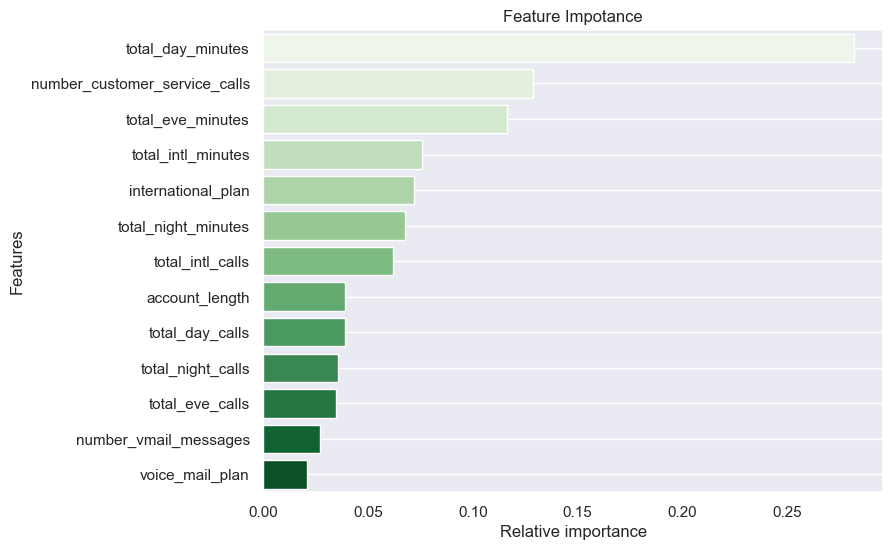

In [51]:
feat_df = pd.DataFrame({'Features': x_train.columns, 'Relative importance': rf_model_tune.feature_importances_})
imp_feat_df = feat_df.sort_values('Relative importance', ascending = False)
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Relative importance', y = 'Features', data = imp_feat_df, color='g', palette='Greens')
plt.title('Feature Impotance')
plt.grid()
plt.show()

# ROC + AUC Curva

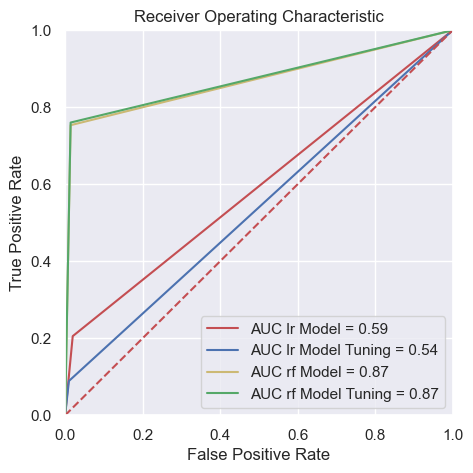

In [53]:
lr_predict = lr_model.predict(x_test)
lr_grid_predict = lr_grid_model.predict(x_test)
rf_predict = rf_model.predict(x_test)
rf_grid_predict = rf_grid_model.predict(x_test)

fpr, tpr, treshold = roc_curve(y_test, lr_predict)
fpr1, tpr1, treshold1 = roc_curve(y_test, lr_grid_predict)
fpr2, tpr2, treshold2 = roc_curve(y_test, rf_predict)
fpr3, tpr3, treshold3 = roc_curve(y_test, rf_grid_predict)

roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'r', label='AUC lr Model = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'b', label='AUC lr Model Tuning = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label='AUC rf Model = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'g', label='AUC rf Model Tuning = %0.2f' % roc_auc3)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# END